David Garza Safi


## Solución de problemas
 



Para este projecto trabajare con la base de datos de calificaciones. Nos interesa tratar de predecir la
calificación final de estudiantes de un curso, a partir de su información demográfica y sus
calificaciones de los primeros dos periodos.


Utilizare el archivo de nombre “Calificaciones.csv”, donde se puede encontrar información
para 395 estudiantes, con 10 variables en total. Los datos se descargaron del Student
Performance Data Set en el UCI Machine Learning Repository.


La base de datos cuenta con la siguiente información:
- “Escuela”. Indica si el estudiante en cuestión asistía a la escuela Gabriel Pereira (GP) o a la escuela Mousinho da Silveira (MS).
- “Sexo”. F para mujeres y H para hombres.
- “Edad”. Edad del estudiante, en años.
- “HorasDeEstudio”. Cantidad de horas de estudio: 1 indica menos de dos horas, 2 indica de dos a cinco horas, 3 indica de cinco a diez horas, 4 indica más de diez horas.
- “Reprobadas”. Indica la cantidad de materias reprobadas previamente.
- “Internet”. Si el estudiante tenía acceso (yes) o no (no) a internet en su casa.
- “Faltas”. Cantidad de veces que faltó a clases.
- “G1”. Calificación del primer periodo, escala del 0 al 20.
- “G2”. Calificación del segundo periodo, esca


Objetivo:
    Trabajar con una base de datos de calificaciones. En la cual nos interesa tratar de predecir la calificación final de estudiantes de un curso, a
 partir de su información demográfica y sus calificaciones de los primeros dos periodos.


#### 1. Se importa la base de datos del archivo “Calificaciones.csv” al ambiente de trabajo.


In [14]:
#Importa la librerias que se van a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Lee el archivo
df = pd.read_csv("Calificaciones.csv")

#Imprime en consola las dimensiones de los datos
print("Dimensiones de los datos: ")
print(df.shape)
print("\n")
#Imprime los tipos de datos de cada columna en el DataFrame
print("Tipo de datos: ")
print(df.dtypes)

Dimensiones de los datos: 
(395, 10)


Tipo de datos: 
Escuela           object
Sexo              object
Edad               int64
HorasDeEstudio     int64
Reprobadas         int64
Internet          object
Faltas             int64
G1                 int64
G2                 int64
G3                 int64
dtype: object


Una observacion que podemos hacer del tipo de varible que usa nuestra base de datos es que no todos usan el mismo tipo de variable. dtypes nos muestra que Escuela, Sexo y Internet sib objectos. Lo cual no nos van a servir para un entramineto de regresion lineal multiple. 

#### 2. Se modifica todas las variables categóricas, de forma que los nuevos datos sean útiles para generar un modelo de regresión lineal múltiple.

In [15]:
#Crea variables dummy para las columnas "Escuela", "Sexo" e "Internet"
calif_mod = pd.get_dummies(df, columns=["Escuela", "Sexo", "Internet"], drop_first=True)
#Muestra las primeras filas del DataFrame modificado para revisar los cambios
print("Datos Modificados: ")
print(calif_mod.head())
print("\n")

#Imprime los tipos de datos de las columnas del DataFrame modificado
print("Tipo de Datos del Dataframe actualizado: ")
print(calif_mod.dtypes)

Datos Modificados: 
   Edad  HorasDeEstudio  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  \
0    18               2           0       6   5   6   6       False   False   
1    17               2           0       4   5   5   6       False   False   
2    15               2           3      10   7   8  10       False   False   
3    15               3           0       2  15  14  15       False   False   
4    16               2           0       4   6  10  10       False   False   

   Internet_yes  
0         False  
1          True  
2          True  
3          True  
4         False  


Tipo de Datos del Dataframe actualizado: 
Edad              int64
HorasDeEstudio    int64
Reprobadas        int64
Faltas            int64
G1                int64
G2                int64
G3                int64
Escuela_MS         bool
Sexo_M             bool
Internet_yes       bool
dtype: object


Como mencionado anteriorment para las varibales "Escuela", "Sexo" e "Internet" son tipo de varibles que no se pueden usar. Por la cual se cambiaron de Object a Booleanos para que sean guardados como valores de 0 o 1. Este tipo de dato si se puede trabajar en nuestra metodologia. 

#### 3. Se identifican valores atípicos para la variable “Faltas”, utilizando el método de Tukey con k=3.

In [16]:
#Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) para la columna "Faltas"
Q1 = df["Faltas"].quantile(0.25)  # Primer cuartil (25% de los datos)
Q3 = df["Faltas"].quantile(0.75)  # Tercer cuartil (75% de los datos)

#Calcular el rango intercuartílico (IQR) como la diferencia entre Q3 y Q1
IQR = Q3 - Q1  #Rango intercuartílico

#Definir el multiplicador (k) para determinar los límites de los valores atípicos
k = 3  #Tukey sugiere usar k=3 para detectar valores atípicos

#Calcular los límites inferior y superior para los valores atípicos
limite_inferior = Q1 - k * IQR  #Límite inferior para valores atípicos
limite_superior = Q3 + k * IQR  #Límite superior para valores atípicos

#Identificar las observaciones atípicas en el DataFrame modificado 
val_ati = calif_mod[(calif_mod["Faltas"] < limite_inferior) | (calif_mod["Faltas"] > limite_superior)]

#Imprimir las observaciones atípicas de la columna "Faltas"
print("Observaciones atípicas en la variable 'Faltas':")
print(val_ati)

#Se concluye que la columna de faltas no perjudica el modelo y se descarta.
calif_no_atis = calif_mod[(calif_mod["Faltas"] >= limite_inferior) & (calif_mod["Faltas"] <= limite_superior)]

Observaciones atípicas en la variable 'Faltas':
     Edad  HorasDeEstudio  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  \
74     16               2           0      54  11  12  11       False   False   
183    17               2           0      56   9   9   8       False   False   
276    18               2           0      75  10   9   9       False   False   
307    19               1           1      38   8   9   8       False    True   
315    19               3           1      40  13  11  11       False   False   

     Internet_yes  
74           True  
183          True  
276          True  
307          True  
315          True  


Observando los valores atípicos, lo que destaca es que los estudiantes con edades entre 16 y 19 años tienen un número elevado de faltas en comparación con el resto del grupo. Sin embargo, sigue existiendo un error en la forma en que estos valores se distribuyen, ya que son significativamente diferentes a los valores más comunes. Debido a que estos valores atípicos corresponden solo a 5 observaciones de un total de 395, considero que lo más adecuado sería eliminar estos casos para evitar que distorsionen el entrenamiento del modelo y afecten los resultados ya que pueden afectar negativamente el entrenamiento de nuestro modelo.

Debido a esto en la ultima linea del codigo se descarta la parte que perjudica la variable de Faltas. Para que los valores que se usen este en los cuartiles que queremos. 

#### 4. Se genera una matriz de correlaciones para encontrar potenciales problemas de colinealidad.

Índices de las columnas con la mayor correlación:
5 6


Mayor correlación entre: 
G2 y G3


Valor de correlación: 
0.90


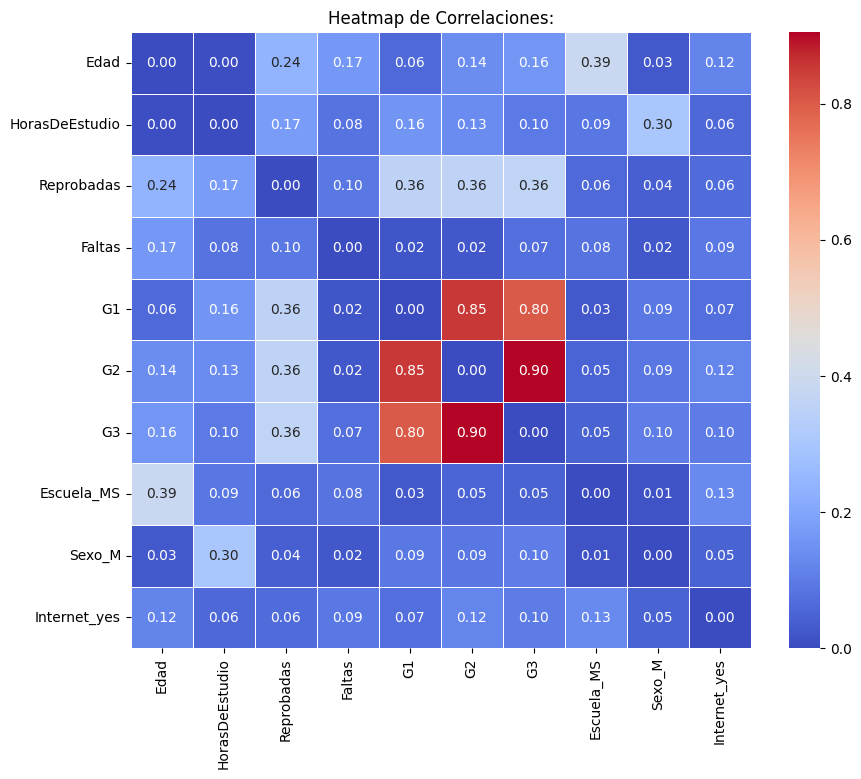


Se recomienda eliminar una de las variables con alta correlación para evitar problemas de colinealidad.


In [23]:
"""
Genera una matriz de correlaciones para encontrar posibles problemas de colinealidad,
y visualiza los resultados mediante un heatmap. Además, determina si es necesario eliminar
alguna variable, explicando el razonamiento detrás de esta decisión. 
"""

#1. Calcula la matriz de correlación absoluta
cor = calif_no_atis.corr().abs()

#2. Establece los valores diagonales de la matriz de correlación a 0 
#(para evitar que la correlación con la misma variable sea siempre la mayor)
np.fill_diagonal(cor.values, 0)

#3. Encuentra los índices de la mayor correlación en la matriz
i, j = np.unravel_index(cor.values.argmax(), cor.shape)

#4. Imprime los índices de las columnas con la mayor correlación
print("Índices de las columnas con la mayor correlación:")
print(i, j)
print("\n")

#5. Imprime los nombres de las columnas con la mayor correlación y el valor de la correlación
print(f"Mayor correlación entre: \n{cor.index[i]} y {cor.columns[j]}")
print("\n")
print(f"Valor de correlación: \n{cor.iloc[i, j]:.2f}")

#6. Genera y muestra un heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(cor, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlaciones:")
plt.show()

#7. Determina si es necesario eliminar variables por colinealidad (basado en el heatmap y la mayor correlación)
#Si la correlación es mayor que 0.90 entre dos variables, es recomendable eliminar una de ellas
if cor.iloc[i, j] > 0.90:  #Si la correlación es mayor a 0.90
    print("\nSe recomienda eliminar una de las variables con alta correlación para evitar problemas de colinealidad.")
else:
    print("\nNo se identificaron problemas significativos de colinealidad.")

Al analizar la matriz de correlación, se observa que la mayor correlación se encuentra entre las variables 'G2' y 'G3', lo que indica que estas dos variables están fuertemente relacionadas. Lo que propondria como siguiente paso, para explorar posibles relaciones adicionales en el conjunto de datos, generaria una nueva variable que represente la interacción entre 'HorasDeEstudio' y 'Faltas'. Lo cual son dos variables muy interlazadas, esto nos permitirá examinar si existe alguna relación significativa entre estas variables y la calificacion. 

#### 5. Términos de interacción.





In [27]:
#Importa la función train_test_split del módulo sklearn.model_selection
from sklearn.model_selection import train_test_split

#Se crea una nueva columna 'HorasDeEstudio_Faltas' multiplicando 'HorasDeEstudio' y 'Faltas'
calif_no_atis["HorasDeEstudio_Faltas"] = calif_no_atis["HorasDeEstudio"] * calif_no_atis["Faltas"]

#Se Crea una nueva columna 'G2_G3' multiplicando 'G2' y 'G3'
calif_no_atis["G2_G3"] = calif_no_atis["G2"] * calif_no_atis["G3"]

#Se Muestra las primeras 5 filas del DataFrame modificado
print("\nDatos Modificados con nuevas columnas:")
print(calif_no_atis.head(5))



Datos Modificados con nuevas columnas:
   Edad  HorasDeEstudio  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  \
0    18               2           0       6   5   6   6       False   False   
1    17               2           0       4   5   5   6       False   False   
2    15               2           3      10   7   8  10       False   False   
3    15               3           0       2  15  14  15       False   False   
4    16               2           0       4   6  10  10       False   False   

   Internet_yes  HorasDeEstudio_Faltas  G2_G3  
0         False                     12     36  
1          True                      8     30  
2          True                     20     80  
3          True                      6    210  
4         False                      8    100  


C:\Users\PC\AppData\Local\Temp\ipykernel_2332\2644526908.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calif_no_atis["HorasDeEstudio_Faltas"] = calif_no_atis["HorasDeEstudio"] * calif_no_atis["Faltas"]
C:\Users\PC\AppData\Local\Temp\ipykernel_2332\2644526908.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calif_no_atis["G2_G3"] = calif_no_atis["G2"] * calif_no_atis["G3"]


#### 6. Entrenamiento un modelo de regresión lineal múltiple en un subconjunto de datos que corresponda al 80% de los datos totales.

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     267.1
Date:                Mon, 10 Feb 2025   Prob (F-statistic):          8.76e-148
Time:                        12:08:01   Log-Likelihood:                -548.98
No. Observations:                 312   AIC:                             1122.
Df Residuals:                     300   BIC:                             1167.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.14

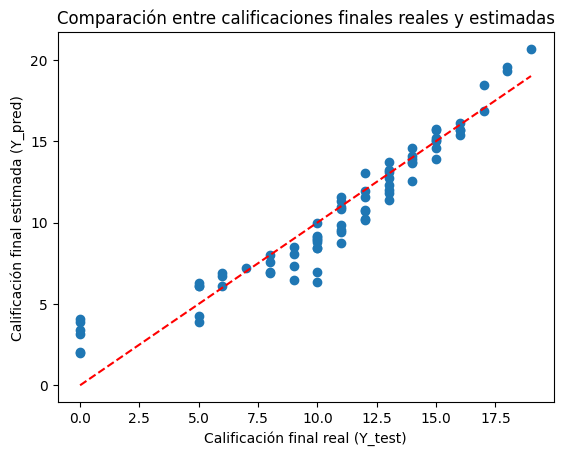

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

#Convertir las columnas categóricas a valores numéricos (si aún no lo están)
calif_no_atis = calif_no_atis.astype({'Escuela_MS': 'int64', 'Sexo_M': 'int64', 'Internet_yes': 'int64'})

#Dividir los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
#train_size=0.8 indica que el 80% de los datos se usarán para entrenar el modelo
train_data, test_data = train_test_split(calif_no_atis, train_size=0.8, random_state=42)

#Definir las variables predictoras (X) y la variable objetivo (Y) para el entrenamiento
X_train = train_data.drop("G3", axis=1)  # Eliminar la columna "G3" que es la variable objetivo
Y_train = train_data["G3"]  # La columna "G3" es la calificación final (variable objetivo)

#Definir las variables predictoras (X_test) y la variable objetivo (Y_test) para el conjunto de prueba
X_test = test_data.drop("G3", axis=1)
Y_test = test_data["G3"]

#Ajustar el modelo de regresión lineal múltiple utilizando el conjunto de entrenamiento
#sm.add_constant(X_train) agrega un término constante (intercepto) al modelo
model = sm.OLS(Y_train, sm.add_constant(X_train))

#Ajustar el modelo a los datos
results = model.fit()

#Imprimir un resumen de los resultados del modelo
print(results.summary())

#Realizar predicciones sobre el conjunto de prueba (20% restante)
Y_pred = results.predict(sm.add_constant(X_test))

#Se Crea una gráfica de dispersión de las calificaciones finales reales contra las predicciones
import matplotlib.pyplot as plt

plt.scatter(Y_test, Y_pred)  # Gráfica de dispersión
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Línea diagonal
plt.xlabel("Calificación final real (Y_test)")
plt.ylabel("Calificación final estimada (Y_pred | G3)")
plt.title("Comparación entre calificaciones finales reales y estimadas")
plt.show()


**Análisis de los resultados del modelo:**

Se puede observar que el modelo de regresión lineal tiene un buen desempeño, ya que, en general, las predicciones (puntos azules) están cerca de la línea diagonal, lo que indica que las calificaciones finales estimadas por el modelo son bastante cercanas a las reales. Esto sugiere que el modelo ha aprendido de manera efectiva las relaciones entre las variables predictoras y la calificación final.

Sin embargo, hay un área de mejora visible en la gráfica: cuando la calificación real es baja (cerca de 0), el modelo tiende a predecir calificaciones mucho más altas (cerca de 4). Esto indica que el modelo podría tener dificultades para predecir correctamente los valores más bajos de la calificación final, y se podría mejorar en ese rango. Para abordar este problema, sería útil explorar más a fondo las características de los estudiantes con calificaciones bajas, y quizás ajustar el modelo o considerar otras técnicas que ayuden a mejorar las predicciones en esos casos específicos.